# === Train & Validation ===

## Import Transaction,Member and User_log_summary

In [1]:
import pandas as pd

In [2]:
log_summary = pd.read_csv('F:/kaggle/final_data/user_log_summary_9to3.tsv', sep='\t', header=None)

In [3]:
log_summary.shape

(5603682, 17)

In [4]:
transaction = pd.read_csv("F:/kaggle/final_data/all_tran_except_log_9to3.csv")

In [5]:
transaction.shape

(6670740, 16)

In [6]:
len(log_summary[0].unique())

1241950

In [7]:
len(transaction["msno"].unique())

1071847

log_summary의 msno가 tran의 msno 보다 더 많다. 

## Describe & Dtype

In [8]:
log_summary[:5]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,dx7tfNuNmuoHsRrM/qxVFSQxvsFpL0X68wjkEHiJ2bk=,20160921,20161021,2.857143,0.857143,0.571429,0.571429,12.000000,12.857143,3314.734288,20,6,4,4,84,90,23203.140015
1,dx8DaYO7EG7Q0yx3nDULpKvVKaswjCzBw3+CckARskw=,20161130,20170118,11.000000,0.400000,0.800000,0.400000,22.200000,32.400000,5743.954788,55,2,4,2,111,162,28719.773941
2,dx9aHQzyWE0ZKT1Ezn+gaKdDD/ZlUNnVlmosQZUo2AI=,20161231,20170206,0.928571,0.928571,0.500000,0.500000,15.571429,13.857143,3697.575038,13,13,7,7,218,194,51766.050537
3,dx9n7Np84QfTBvIVuZ7cnmGAyqTtUOKFQ6s8qBpZeJM=,20160902,20161001,8.633333,2.600000,1.933333,3.033333,45.566667,30.433333,13681.262248,259,78,58,91,1367,913,410437.867432
4,dxA9zQQ5WD9U4JG5nkWh4S7P5NWJcC9LUPdl913zGWo=,20161011,20161111,1.600000,3.000000,0.800000,0.600000,4.400000,10.200000,1840.187587,8,15,4,3,22,51,9200.937935


In [9]:
transaction[:5]

,msno,city,bd,registered_via,registration_init_time,count,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,FebChurn,MarChurn
0,3izC3XTLkPKhtsh4ZUvjMuIom17888+rkvOS99M2GyU=,1.0,0.0,9.0,20130611.0,237.0,38,30,149,149,0,20160920,20161020,0,1.0,NaN
1,3izC3XTLkPKhtsh4ZUvjMuIom17888+rkvOS99M2GyU=,1.0,0.0,9.0,20130611.0,237.0,38,30,149,149,0,20170123,20170222,0,1.0,NaN
2,3izC3XTLkPKhtsh4ZUvjMuIom17888+rkvOS99M2GyU=,1.0,0.0,9.0,20130611.0,237.0,38,30,149,149,0,20161210,20170109,0,1.0,NaN
3,3izC3XTLkPKhtsh4ZUvjMuIom17888+rkvOS99M2GyU=,1.0,0.0,9.0,20130611.0,237.0,38,30,149,149,0,20161109,20161209,0,1.0,NaN
4,jwIvIww2DPQJdnmJF+H72zYOIGizIL9cd4qkGZZEnLo=,1.0,21.0,3.0,20150329.0,101.0,29,30,180,180,0,20161109,20161209,0,1.0,0.0


- to set column name in User_log_summary table

In [6]:
log_summary.columns = ['msno','transaction_date_in_log','membership_expire_date_in_log','avg_num_25',
'avg_num_50','avg_num_75','avg_num_985', 'avg_num_100',
'avg_num_unq','avg_total_sec','sum_num_25','sum_num_50',
'sum_num_75','sum_num_985','sum_num_100','sum_num_unq','sum_total_sec']

In [7]:
log_summary[:5]

,msno,transaction_date_in_log,membership_expire_date_in_log,avg_num_25,avg_num_50,avg_num_75,avg_num_985,avg_num_100,avg_num_unq,avg_total_sec,sum_num_25,sum_num_50,sum_num_75,sum_num_985,sum_num_100,sum_num_unq,sum_total_sec
0,dx7tfNuNmuoHsRrM/qxVFSQxvsFpL0X68wjkEHiJ2bk=,20160921,20161021,2.857143,0.857143,0.571429,0.571429,12.000000,12.857143,3314.734288,20,6,4,4,84,90,23203.140015
1,dx8DaYO7EG7Q0yx3nDULpKvVKaswjCzBw3+CckARskw=,20161130,20170118,11.000000,0.400000,0.800000,0.400000,22.200000,32.400000,5743.954788,55,2,4,2,111,162,28719.773941
2,dx9aHQzyWE0ZKT1Ezn+gaKdDD/ZlUNnVlmosQZUo2AI=,20161231,20170206,0.928571,0.928571,0.500000,0.500000,15.571429,13.857143,3697.575038,13,13,7,7,218,194,51766.050537
3,dx9n7Np84QfTBvIVuZ7cnmGAyqTtUOKFQ6s8qBpZeJM=,20160902,20161001,8.633333,2.600000,1.933333,3.033333,45.566667,30.433333,13681.262248,259,78,58,91,1367,913,410437.867432
4,dxA9zQQ5WD9U4JG5nkWh4S7P5NWJcC9LUPdl913zGWo=,20161011,20161111,1.600000,3.000000,0.800000,0.600000,4.400000,10.200000,1840.187587,8,15,4,3,22,51,9200.937935


In [8]:
log_summary.dtypes

msno                              object
transaction_date_in_log            int64
membership_expire_date_in_log      int64
avg_num_25                       float64
avg_num_50                       float64
avg_num_75                       float64
avg_num_985                      float64
avg_num_100                      float64
avg_num_unq                      float64
avg_total_sec                    float64
sum_num_25                         int64
sum_num_50                         int64
sum_num_75                         int64
sum_num_985                        int64
sum_num_100                        int64
sum_num_unq                        int64
sum_total_sec                    float64
dtype: object

In [13]:
transaction.dtypes

msno                       object
city                      float64
bd                        float64
registered_via            float64
registration_init_time    float64
count                     float64
payment_method_id           int64
payment_plan_days           int64
plan_list_price             int64
actual_amount_paid          int64
is_auto_renew               int64
transaction_date            int64
membership_expire_date      int64
is_cancel                   int64
FebChurn                  float64
MarChurn                  float64
dtype: object

- Change data type
    - log_summary
        - date : transaction_date_in_log, membership_expire_date_in_log
    - transaction 
        - str : city, registered_via, payment_method_id, is_auto_renew, FebChurn, MarChurn
        - int : bd, count, is_cancel
        - date : registration_init_time, transaction_date, membership_expire_date

In [9]:
log_summary[['transaction_date_in_log','membership_expire_date_in_log']] = log_summary[['transaction_date_in_log','membership_expire_date_in_log']].astype(str)

In [10]:
log_summary['transaction_date_in_log'] = pd.to_datetime(log_summary.transaction_date_in_log, format="%Y%m%d")
log_summary['membership_expire_date_in_log'] = pd.to_datetime(log_summary.membership_expire_date_in_log, format="%Y%m%d")

In [11]:
transaction.isnull().sum()

msno                           0
city                      764206
bd                        764206
registered_via            764206
registration_init_time    764206
count                     817125
payment_method_id              0
payment_plan_days              0
plan_list_price                0
actual_amount_paid             0
is_auto_renew                  0
transaction_date               0
membership_expire_date         0
is_cancel                      0
FebChurn                  255197
MarChurn                  509304
dtype: int64

In [12]:
transaction[['city','registered_via','payment_method_id','is_auto_renew','FebChurn','MarChurn','transaction_date','membership_expire_date','is_cancel']] = transaction[['city','registered_via','payment_method_id','is_auto_renew','FebChurn','MarChurn','transaction_date','membership_expire_date','is_cancel']].astype(str)
transaction[['bd','count']] = transaction[['bd','count']].fillna(0).astype(int)

In [18]:
transaction[['registration_init_time']].isnull().sum()

registration_init_time    764206
dtype: int64

transaction은 있는데, member 정보(registration_init_time)가 없는 msno가 많네...

In [13]:
transaction[['registration_init_time']] = transaction[['registration_init_time']].astype(str)

In [14]:
transaction['registration_init_time'] = pd.to_datetime(transaction.registration_init_time, format="%Y%m%d.0")
transaction['transaction_date'] = pd.to_datetime(transaction.transaction_date, format="%Y%m%d")
transaction['membership_expire_date'] = pd.to_datetime(transaction.membership_expire_date, format="%Y%m%d")

In [15]:
log_summary.dtypes

msno                                     object
transaction_date_in_log          datetime64[ns]
membership_expire_date_in_log    datetime64[ns]
avg_num_25                              float64
avg_num_50                              float64
avg_num_75                              float64
avg_num_985                             float64
avg_num_100                             float64
avg_num_unq                             float64
avg_total_sec                           float64
sum_num_25                                int64
sum_num_50                                int64
sum_num_75                                int64
sum_num_985                               int64
sum_num_100                               int64
sum_num_unq                               int64
sum_total_sec                           float64
dtype: object

In [22]:
transaction.dtypes

msno                              object
city                              object
bd                                 int32
registered_via                    object
registration_init_time    datetime64[ns]
count                              int32
payment_method_id                 object
payment_plan_days                  int64
plan_list_price                    int64
actual_amount_paid                 int64
is_auto_renew                     object
transaction_date          datetime64[ns]
membership_expire_date    datetime64[ns]
is_cancel                         object
FebChurn                          object
MarChurn                          object
dtype: object

Complete set data type each table

- Check describe

In [23]:
transaction.describe().round(2)

,bd,count,payment_plan_days,plan_list_price,actual_amount_paid
count,6670740.00,6670740.00,6670740.00,6670740.00,6670740.00
mean,11.98,256.13,31.51,135.81,135.41
std,19.59,230.73,19.81,86.11,86.36
min,-3152.00,0.00,1.00,0.00,0.00
25%,0.00,43.00,30.00,99.00,99.00
50%,0.00,199.00,30.00,149.00,149.00
75%,26.00,430.00,30.00,149.00,149.00
max,2016.00,790.00,450.00,2000.00,2000.00


In [24]:
transaction[["msno","city","registered_via",                    
"registration_init_time","payment_method_id",                 
"is_auto_renew","transaction_date",          
"membership_expire_date","is_cancel",                         
"FebChurn","MarChurn"]].describe()

,msno,city,registered_via,registration_init_time,payment_method_id,is_auto_renew,transaction_date,membership_expire_date,is_cancel,FebChurn,MarChurn
count,6670740,6670740,6670740,5906534,6670740,6670740,6670740,6670740,6670740,6670740,6670740
unique,1071847,22,6,4750,33,2,212,1120,2,3,3
top,WHsCtkOVsauvqBL0ULuG38887y7aU8GXdCmJMjw6hjQ=,1.0,7.0,2015-10-09 00:00:00,41,1,2017-02-28 00:00:00,2017-02-28 00:00:00,0,0.0,0.0
freq,150,3053877,3297506,11086,3893548,6052510,201321,130540,6543126,6171620,5775320
first,NaN,NaN,NaN,2004-03-26 00:00:00,NaN,NaN,2016-09-01 00:00:00,1970-01-01 00:00:00,NaN,NaN,NaN
last,NaN,NaN,NaN,2017-04-24 00:00:00,NaN,NaN,2017-03-31 00:00:00,2025-10-02 00:00:00,NaN,NaN,NaN


In [25]:
log_summary.describe().round(2)

,avg_num_25,avg_num_50,avg_num_75,avg_num_985,avg_num_100,avg_num_unq,avg_total_sec,sum_num_25,sum_num_50,sum_num_75,sum_num_985,sum_num_100,sum_num_unq,sum_total_sec
count,5603682.00,5603682.00,5603682.00,5603682.00,5603682.00,5603682.00,5603682.00,5603682.00,5603682.00,5603682.00,5603682.00,5603682.00,5603682.00,5603682.00
mean,5.76,1.42,0.87,0.95,24.67,24.90,6527.75,122.84,30.11,19.00,21.38,575.54,560.74,151224.34
std,7.87,1.99,1.04,1.65,26.85,20.46,6471.92,235.39,52.70,30.92,64.56,1017.90,832.13,249715.06
min,0.00,0.00,0.00,0.00,0.00,1.00,0.01,0.00,0.00,0.00,0.00,0.00,1.00,0.01
25%,1.80,0.48,0.33,0.33,10.08,12.11,2880.93,17.00,4.00,3.00,3.00,89.00,105.00,25245.83
50%,3.67,1.00,0.65,0.67,17.67,19.85,4814.51,55.00,15.00,10.00,10.00,288.00,318.00,79077.09
75%,7.00,1.75,1.11,1.17,29.64,31.17,7872.74,142.00,36.00,24.00,25.00,674.00,707.00,180933.63
max,1846.50,452.00,285.00,503.57,5752.33,1560.20,1213647.55,101352.00,8954.00,3079.00,18199.00,80394.00,51262.00,18302891.00


In [26]:
log_summary[["transaction_date_in_log","membership_expire_date_in_log"]].describe()

,transaction_date_in_log,membership_expire_date_in_log
count,5603682,5603682
unique,212,1378
top,2016-10-31 00:00:00,2017-02-28 00:00:00
freq,164007,97576
first,2016-09-01 00:00:00,2016-09-01 00:00:00
last,2017-03-31 00:00:00,2036-10-15 00:00:00


## Join

In [16]:
transaction[:2]

,msno,city,bd,registered_via,registration_init_time,count,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,FebChurn,MarChurn
0,3izC3XTLkPKhtsh4ZUvjMuIom17888+rkvOS99M2GyU=,1.0,0,9.0,2013-06-11,237,38,30,149,149,0,2016-09-20,2016-10-20,0,1.0,nan
1,3izC3XTLkPKhtsh4ZUvjMuIom17888+rkvOS99M2GyU=,1.0,0,9.0,2013-06-11,237,38,30,149,149,0,2017-01-23,2017-02-22,0,1.0,nan


In [17]:
log_summary[:2]

,msno,transaction_date_in_log,membership_expire_date_in_log,avg_num_25,avg_num_50,avg_num_75,avg_num_985,avg_num_100,avg_num_unq,avg_total_sec,sum_num_25,sum_num_50,sum_num_75,sum_num_985,sum_num_100,sum_num_unq,sum_total_sec
0,dx7tfNuNmuoHsRrM/qxVFSQxvsFpL0X68wjkEHiJ2bk=,2016-09-21,2016-10-21,2.857143,0.857143,0.571429,0.571429,12.0,12.857143,3314.734288,20,6,4,4,84,90,23203.140015
1,dx8DaYO7EG7Q0yx3nDULpKvVKaswjCzBw3+CckARskw=,2016-11-30,2017-01-18,11.000000,0.400000,0.800000,0.400000,22.2,32.400000,5743.954788,55,2,4,2,111,162,28719.773941


- transaction을 기준으로 left merge

In [18]:
transaction_merge_log = transaction.merge(log_summary, left_on=['msno','transaction_date','membership_expire_date'], right_on=['msno','transaction_date_in_log','membership_expire_date_in_log'], how='left')

In [19]:
transaction_merge_log.shape

(6670740, 32)

In [20]:
transaction.shape

(6670740, 16)

In [21]:
log_summary.shape

(5603682, 17)

In [22]:
transaction_merge_log.isnull().sum()

msno                                   0
city                                   0
bd                                     0
registered_via                         0
registration_init_time            764206
count                                  0
payment_method_id                      0
payment_plan_days                      0
plan_list_price                        0
actual_amount_paid                     0
is_auto_renew                          0
transaction_date                       0
membership_expire_date                 0
is_cancel                              0
FebChurn                               0
MarChurn                               0
transaction_date_in_log          1565272
membership_expire_date_in_log    1565272
avg_num_25                       1565272
avg_num_50                       1565272
avg_num_75                       1565272
avg_num_985                      1565272
avg_num_100                      1565272
avg_num_unq                      1565272
avg_total_sec   

- 없는 log 정보는 모두 0으로 채우자!! log가 없었던 거니까!
- join에 사용된 중복변수 transaction_date_in_log, membership_expire_date_in_log 는 지운다.

In [23]:
del transaction_merge_log["transaction_date_in_log"]
del transaction_merge_log["membership_expire_date_in_log"]

In [24]:
transaction_merge_log[['avg_num_25','avg_num_50','avg_num_75',                       
'avg_num_985','avg_num_100','avg_num_unq','avg_total_sec',                    
'sum_num_25','sum_num_50','sum_num_75','sum_num_985',                      
'sum_num_100','sum_num_unq','sum_total_sec']] = \
transaction_merge_log[['avg_num_25','avg_num_50','avg_num_75',                       
'avg_num_985','avg_num_100','avg_num_unq','avg_total_sec',                    
'sum_num_25','sum_num_50','sum_num_75','sum_num_985',                      
'sum_num_100','sum_num_unq','sum_total_sec']].fillna(value=0)  

In [25]:
transaction_merge_log.isnull().sum()

msno                           0
city                           0
bd                             0
registered_via                 0
registration_init_time    764206
count                          0
payment_method_id              0
payment_plan_days              0
plan_list_price                0
actual_amount_paid             0
is_auto_renew                  0
transaction_date               0
membership_expire_date         0
is_cancel                      0
FebChurn                       0
MarChurn                       0
avg_num_25                     0
avg_num_50                     0
avg_num_75                     0
avg_num_985                    0
avg_num_100                    0
avg_num_unq                    0
avg_total_sec                  0
sum_num_25                     0
sum_num_50                     0
sum_num_75                     0
sum_num_985                    0
sum_num_100                    0
sum_num_unq                    0
sum_total_sec                  0
dtype: int

### Train set 만들기! [ train(2월churn) + transaction(1월까지) + user_log(1월까지) + member ]

### Validation set 만들기![train(3월churn) + transaction(2월까지) + user_log(2월까지) + member]

In [26]:
transaction_merge_log["transaction_date"].min()

Timestamp('2016-09-01 00:00:00')

In [27]:
transaction_merge_log["transaction_date"].max()

Timestamp('2017-03-31 00:00:00')

In [28]:
transaction_merge_log_9to1 = transaction_merge_log[transaction_merge_log["transaction_date"] < "2017-02-01"]

In [29]:
transaction_merge_log_10to2 = transaction_merge_log[transaction_merge_log["transaction_date"] < "2017-03-01"]
transaction_merge_log_10to2 = transaction_merge_log_10to2[transaction_merge_log_10to2["transaction_date"] >= "2016-10-01"]

In [30]:
transaction_merge_log_9to1.shape

(4632151, 30)

In [31]:
transaction_merge_log_10to2.shape

(4783576, 30)

In [32]:
transaction_merge_log_9to1["transaction_date"].min()

Timestamp('2016-09-01 00:00:00')

In [33]:
transaction_merge_log_9to1["transaction_date"].max()

Timestamp('2017-01-31 00:00:00')

In [34]:
transaction_merge_log_10to2["transaction_date"].min()

Timestamp('2016-10-01 00:00:00')

In [35]:
transaction_merge_log_10to2["transaction_date"].max()

Timestamp('2017-02-28 00:00:00')

In [36]:
transaction_merge_log_9to1.to_csv("F:/kaggle/final_data/transaction_merge_log_9to1.csv", index=False)
transaction_merge_log_10to2.to_csv("F:/kaggle/final_data/transaction_merge_log_10to2.csv", index=False)

- 파생변수 ex_expire_date 랑 discount

In [37]:
transaction_merge_log_9to1 = transaction_merge_log_9to1.sort_values(['msno','transaction_date'])
transaction_merge_log_10to2 = transaction_merge_log_10to2.sort_values(['msno','transaction_date'])

In [38]:
transaction_merge_log_9to1['ex_expire_date'] = transaction_merge_log_9to1.groupby(['msno'])['membership_expire_date'].shift(1)
transaction_merge_log_10to2['ex_expire_date'] = transaction_merge_log_10to2.groupby(['msno'])['membership_expire_date'].shift(1)

In [39]:
transaction_merge_log_9to1['sub_tran_exExpire_day'] = transaction_merge_log_9to1['transaction_date'] - transaction_merge_log_9to1['ex_expire_date']
transaction_merge_log_10to2['sub_tran_exExpire_day'] = transaction_merge_log_10to2['transaction_date'] - transaction_merge_log_10to2['ex_expire_date']

In [40]:
transaction_merge_log_9to1['discount'] = (transaction_merge_log_9to1['plan_list_price']-transaction_merge_log_9to1['actual_amount_paid'])/transaction_merge_log_9to1['plan_list_price'] * 100
transaction_merge_log_10to2['discount'] = (transaction_merge_log_10to2['plan_list_price']-transaction_merge_log_10to2['actual_amount_paid'])/transaction_merge_log_9to1['plan_list_price'] * 100

### 날짜 파생변수 만들기 
- registration_init_time    
- transaction_date          
- membership_expire_date    

In [41]:
transaction_merge_log_9to1['r_init_year'] = transaction_merge_log_9to1['registration_init_time'].dt.year
transaction_merge_log_9to1['r_init_month'] = transaction_merge_log_9to1['registration_init_time'].dt.month
transaction_merge_log_9to1['r_init_day'] = transaction_merge_log_9to1['registration_init_time'].dt.day
transaction_merge_log_9to1['r_init_weekday'] = transaction_merge_log_9to1['registration_init_time'].dt.weekday

In [42]:
transaction_merge_log_9to1['tran_year'] = transaction_merge_log_9to1['transaction_date'].dt.year
transaction_merge_log_9to1['tran_month'] = transaction_merge_log_9to1['transaction_date'].dt.month
transaction_merge_log_9to1['tran_day'] = transaction_merge_log_9to1['transaction_date'].dt.day
transaction_merge_log_9to1['tran_weekday'] = transaction_merge_log_9to1['transaction_date'].dt.weekday

In [43]:
transaction_merge_log_9to1['m_expire_year'] = transaction_merge_log_9to1['membership_expire_date'].dt.year
transaction_merge_log_9to1['m_expire_month'] = transaction_merge_log_9to1['membership_expire_date'].dt.month
transaction_merge_log_9to1['m_expire_day'] = transaction_merge_log_9to1['membership_expire_date'].dt.day
transaction_merge_log_9to1['m_expire_weekday'] = transaction_merge_log_9to1['membership_expire_date'].dt.weekday

In [44]:
transaction_merge_log_10to2['r_init_year'] = transaction_merge_log_10to2['registration_init_time'].dt.year
transaction_merge_log_10to2['r_init_month'] = transaction_merge_log_10to2['registration_init_time'].dt.month
transaction_merge_log_10to2['r_init_day'] = transaction_merge_log_10to2['registration_init_time'].dt.day
transaction_merge_log_10to2['r_init_weekday'] = transaction_merge_log_10to2['registration_init_time'].dt.weekday

In [45]:
transaction_merge_log_10to2['tran_year'] = transaction_merge_log_10to2['transaction_date'].dt.year
transaction_merge_log_10to2['tran_month'] = transaction_merge_log_10to2['transaction_date'].dt.month
transaction_merge_log_10to2['tran_day'] = transaction_merge_log_10to2['transaction_date'].dt.day
transaction_merge_log_10to2['tran_weekday'] = transaction_merge_log_10to2['transaction_date'].dt.weekday

In [46]:
transaction_merge_log_10to2['m_expire_year'] = transaction_merge_log_10to2['membership_expire_date'].dt.year
transaction_merge_log_10to2['m_expire_month'] = transaction_merge_log_10to2['membership_expire_date'].dt.month
transaction_merge_log_10to2['m_expire_day'] = transaction_merge_log_10to2['membership_expire_date'].dt.day
transaction_merge_log_10to2['m_expire_weekday'] = transaction_merge_log_10to2['membership_expire_date'].dt.weekday

### One-Hot encoding
- city, 22                     
- registered_via, 6                    
- payment_method_id, 38                                      

In [47]:
def oneHot_to_data(data):
    one_hot_city = pd.get_dummies(data[['city']])
    one_hot_registered_via = pd.get_dummies(data[['registered_via']])
    one_hot_payment_method_id = pd.get_dummies(data[['payment_method_id']])
    
    return one_hot_city,one_hot_registered_via,one_hot_payment_method_id

In [48]:
one_hot_city,one_hot_registered_via,one_hot_payment_method_id = oneHot_to_data(transaction_merge_log_9to1)

In [50]:
transaction_merge_log_9to1_oneHot = pd.concat([transaction_merge_log_9to1, one_hot_city], axis=1)
transaction_merge_log_9to1_oneHot = pd.concat([transaction_merge_log_9to1_oneHot, one_hot_registered_via], axis=1)
transaction_merge_log_9to1_oneHot = pd.concat([transaction_merge_log_9to1_oneHot, one_hot_payment_method_id], axis=1)

In [51]:
one_hot_city,one_hot_registered_via,one_hot_payment_method_id = oneHot_to_data(transaction_merge_log_10to2)

In [52]:
transaction_merge_log_10to2_oneHot = pd.concat([transaction_merge_log_10to2, one_hot_city], axis=1)
transaction_merge_log_10to2_oneHot = pd.concat([transaction_merge_log_10to2_oneHot, one_hot_registered_via], axis=1)
transaction_merge_log_10to2_oneHot = pd.concat([transaction_merge_log_10to2_oneHot, one_hot_payment_method_id], axis=1)

In [53]:
transaction_merge_log_9to1_oneHot.shape

(4632151, 106)

In [54]:
transaction_merge_log_10to2_oneHot.shape

(4783576, 106)

In [55]:
transaction_merge_log_9to1_oneHot.to_csv("F:/kaggle/final_data/transaction_merge_log_9to1_oneHot.csv", index=False)
transaction_merge_log_10to2_oneHot.to_csv("F:/kaggle/final_data/transaction_merge_log_10to2_oneHot.csv", index=False)

In [1]:
"""
TODO:: 메모리 에러로 여기부터 못함 해라!!! 아침일찍 가서!! 
171214 09:30 함
"""
import pandas as pd
transaction_merge_log_9to1_oneHot = pd.read_csv("E:/kaggle/final_data/transaction_merge_log_9to1_oneHot.csv")
transaction_merge_log_10to2_oneHot = pd.read_csv("E:/kaggle/final_data/transaction_merge_log_10to2_oneHot.csv")

transaction_merge_log_9to1_oneHot[["city","registered_via","payment_method_id"]] = transaction_merge_log_9to1_oneHot[["city","registered_via","payment_method_id"]].astype(str)
transaction_merge_log_10to2_oneHot[["city","registered_via","payment_method_id"]] = transaction_merge_log_10to2_oneHot[["city","registered_via","payment_method_id"]].astype(str)

In [2]:
"""
종속변수 맨 뒤로
"""
col_name = list(transaction_merge_log_9to1_oneHot)
col_name.remove('FebChurn')
col_name.append('FebChurn')
col_name.remove('MarChurn')
col_name.append('MarChurn')
transaction_merge_log_9to1_oneHot = transaction_merge_log_9to1_oneHot[col_name]

col_name = list(transaction_merge_log_10to2_oneHot)
col_name.remove('FebChurn')
col_name.append('FebChurn')
col_name.remove('MarChurn')
col_name.append('MarChurn')
transaction_merge_log_10to2_oneHot = transaction_merge_log_10to2_oneHot[col_name]

- 불필요변수 제거

In [3]:
del transaction_merge_log_9to1_oneHot["MarChurn"]
del transaction_merge_log_10to2_oneHot["FebChurn"]

In [7]:
transaction_merge_log_9to1_oneHot["FebChurn"] = transaction_merge_log_9to1_oneHot["FebChurn"].astype(str)
transaction_merge_log_10to2_oneHot["MarChurn"] = transaction_merge_log_10to2_oneHot["MarChurn"].astype(str)

In [10]:
set(transaction_merge_log_9to1_oneHot["FebChurn"])

{'0.0', '1.0', 'nan'}

In [11]:
set(transaction_merge_log_10to2_oneHot["MarChurn"])

{'0.0', '1.0', 'nan'}

- 'nan', 즉 답이 없는 것은지우고 모델 만들기

In [12]:
transaction_merge_log_9to1_oneHot = transaction_merge_log_9to1_oneHot[transaction_merge_log_9to1_oneHot["FebChurn"] != 'nan']
transaction_merge_log_10to2_oneHot = transaction_merge_log_10to2_oneHot[transaction_merge_log_10to2_oneHot["MarChurn"] != 'nan']

In [13]:
transaction_merge_log_9to1_oneHot.shape

(4512692, 105)

In [14]:
transaction_merge_log_10to2_oneHot.shape

(4399448, 105)

In [ ]:
transaction_merge_log_9to1_oneHot.to_csv("E:/kaggle/final_data/transaction_merge_log_9to1_oneHot_train.csv", index=False)
transaction_merge_log_10to2_oneHot.to_csv("E:/kaggle/final_data/transaction_merge_log_10to2_oneHot_validation.csv", index=False)

- 171214 10:20 부터

In [1]:
import pandas as pd
transaction_merge_log_9to1_oneHot = pd.read_csv("E:/kaggle/final_data/transaction_merge_log_9to1_oneHot_train.csv")
transaction_merge_log_10to2_oneHot = pd.read_csv("E:/kaggle/final_data/transaction_merge_log_10to2_oneHot_validation.csv")

transaction_merge_log_9to1_oneHot[["city","registered_via","payment_method_id"]] = transaction_merge_log_9to1_oneHot[["city","registered_via","payment_method_id"]].astype(str)
transaction_merge_log_10to2_oneHot[["city","registered_via","payment_method_id"]] = transaction_merge_log_10to2_oneHot[["city","registered_via","payment_method_id"]].astype(str)

In [2]:
transaction_merge_log_9to1_oneHot.dtypes

msno                       object
city                       object
bd                          int64
registered_via             object
registration_init_time     object
count                       int64
payment_method_id          object
payment_plan_days           int64
plan_list_price             int64
actual_amount_paid          int64
is_auto_renew               int64
transaction_date           object
membership_expire_date     object
is_cancel                   int64
avg_num_25                float64
avg_num_50                float64
avg_num_75                float64
avg_num_985               float64
avg_num_100               float64
avg_num_unq               float64
avg_total_sec             float64
sum_num_25                float64
sum_num_50                float64
sum_num_75                float64
sum_num_985               float64
sum_num_100               float64
sum_num_unq               float64
sum_total_sec             float64
ex_expire_date             object
sub_tran_exExp

In [15]:
transaction_merge_log_9to1_oneHot["sub_tran_exExpire_day"] = transaction_merge_log_9to1_oneHot["sub_tran_exExpire_day"].str.split().str[0]

In [20]:
transaction_merge_log_9to1_oneHot[["sub_tran_exExpire_day"]] = transaction_merge_log_9to1_oneHot[["sub_tran_exExpire_day"]].fillna(0).astype(int)

In [21]:
transaction_merge_log_10to2_oneHot["sub_tran_exExpire_day"] = transaction_merge_log_10to2_oneHot["sub_tran_exExpire_day"].str.split().str[0]
transaction_merge_log_10to2_oneHot[["sub_tran_exExpire_day"]] = transaction_merge_log_10to2_oneHot[["sub_tran_exExpire_day"]].fillna(0).astype(int)

In [26]:
transaction_merge_log_9to1_oneHot[["discount"]].dtypes

discount    float64
dtype: object

In [27]:
transaction_merge_log_9to1_oneHot[["discount"]] = transaction_merge_log_9to1_oneHot[["discount"]].fillna(0).astype(float)
transaction_merge_log_10to2_oneHot[["discount"]] = transaction_merge_log_10to2_oneHot[["discount"]].fillna(0).astype(float)

### 종속변수와의 상관성(Correlation)!!

- correlation check 위해서 data type 변경

In [ ]:
"""
transaction_merge_log_9to1_oneHot[["FebChurn"]] = transaction_with_log_9to1_oneHot[["FebChurn"]].astype(float)
transaction_merge_log_9to1_oneHot[["FebChurn"]] = transaction_with_log_9to1_oneHot[["FebChurn"]].astype(int)
"""

In [ ]:
"""
transaction_merge_log_9to1_oneHot[["is_auto_renew"]] = transaction_merge_log_9to1_oneHot[["is_auto_renew"]].astype(int)
transaction_merge_log_9to1_oneHot[["is_cancel"]] = transaction_merge_log_9to1_oneHot[["is_cancel"]].astype(int)
"""

- Correlation about transaction_merge_log_9to1_oneHot

In [31]:
pearson =  transaction_merge_log_9to1_oneHot.corr(method='pearson')

In [32]:
corr_with_target = pearson.ix[-1][:-1]
corr_with_target[abs(corr_with_target).argsort()[::-1]][:20].round(6)

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


is_auto_renew          -0.250394
payment_method_id_38    0.196086
plan_list_price         0.122793
actual_amount_paid      0.117340
payment_method_id_41   -0.103313
payment_plan_days       0.098507
registered_via_7.0     -0.089244
registered_via_4.0      0.084028
registered_via_3.0      0.066821
is_cancel               0.060644
payment_method_id_36    0.056694
payment_method_id_29    0.055884
payment_method_id_35    0.051876
payment_method_id_32    0.049016
payment_method_id_28    0.044868
city_1.0               -0.036284
count                  -0.036252
tran_year               0.034029
r_init_year             0.032649
tran_month             -0.032593
Name: FebChurn, dtype: float64

In [33]:
attrs = pearson.iloc[:-1,:-1]
threshold = 0.7
important_corrs = (attrs[abs(attrs) > threshold][attrs != 1.0]) \
    .unstack().dropna().to_dict()
unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) \
    for key in important_corrs])), columns=['attribute pair', 'correlation'])

unique_important_corrs = unique_important_corrs.ix[
    abs(unique_important_corrs['correlation']).argsort()[::-1]]

unique_important_corrs

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


,attribute pair,correlation
8,"(sum_num_100, sum_total_sec)",0.989062
12,"(actual_amount_paid, plan_list_price)",0.987405
7,"(avg_num_100, avg_total_sec)",0.986182
3,"(tran_month, tran_year)",-0.970119
17,"(m_expire_month, m_expire_year)",-0.923652
21,"(sum_num_unq, sum_total_sec)",0.901698
0,"(sum_num_50, sum_num_75)",0.886194
24,"(sum_num_100, sum_num_unq)",0.874581
25,"(avg_num_985, sum_num_985)",0.873967
23,"(avg_num_100, sum_num_100)",0.862662


In [ ]:
"""
유효변수중 사용하지 않을 변수 체크
is_auto_renew          -0.250394
    payment_method_id_38    0.196086
plan_list_price         0.122793
    actual_amount_paid      0.117340
payment_method_id_41   -0.103313
    payment_plan_days       0.098507
    registered_via_7.0     -0.089244
registered_via_4.0      0.084028
registered_via_3.0      0.066821
is_cancel               0.060644
payment_method_id_36    0.056694
payment_method_id_29    0.055884
payment_method_id_35    0.051876
payment_method_id_32    0.049016
"""


In [ ]:
- transaction_merge_log_9to1_oneHot에서 사용할 변수
is_auto_renew          -0.250394
plan_list_price         0.122793
payment_method_id_41   -0.103313
registered_via_4.0      0.084028
registered_via_3.0      0.066821
is_cancel               0.060644
payment_method_id_36    0.056694
payment_method_id_29    0.055884
payment_method_id_35    0.051876
payment_method_id_32    0.049016

In [34]:
transaction_merge_log_9to1_oneHot.shape

(4512692, 105)

In [35]:
transaction_merge_log_9to1_oneHot["transaction_date"].min()

'2016-09-01'

In [36]:
transaction_merge_log_9to1_oneHot["transaction_date"].max()

'2017-01-31'

In [37]:
import matplotlib.pyplot as plt

In [38]:
plt.rc('figure', figsize=(12, 8)) # rc 설정하겠다는 거다. resource configuration default:6,4

In [40]:
var = ['is_auto_renew',          
'plan_list_price',        
'payment_method_id_41',   
'registered_via_4.0',    
'registered_via_3.0',    
'is_cancel',              
'payment_method_id_36',   
'payment_method_id_29',   
'payment_method_id_35',  
'payment_method_id_32']                

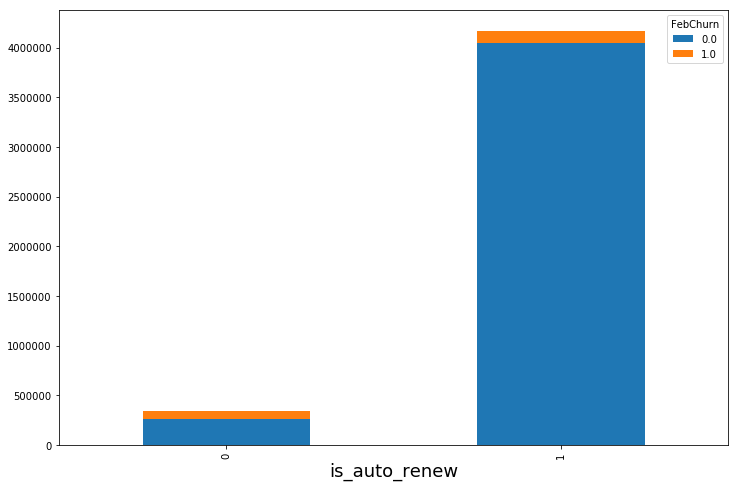

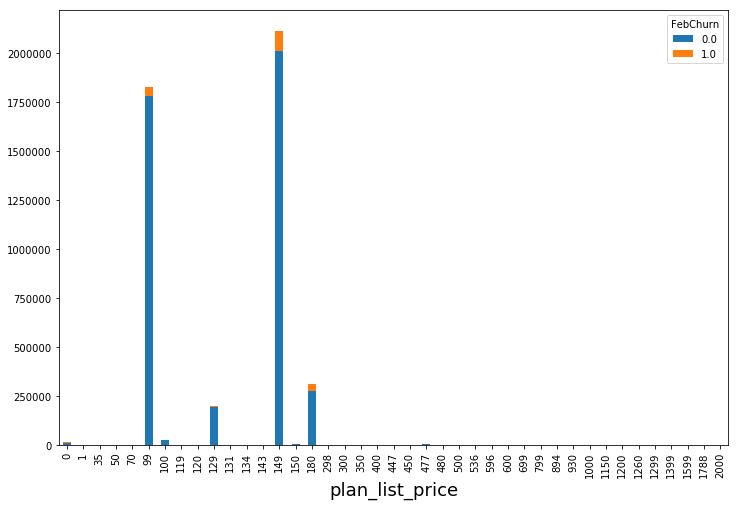

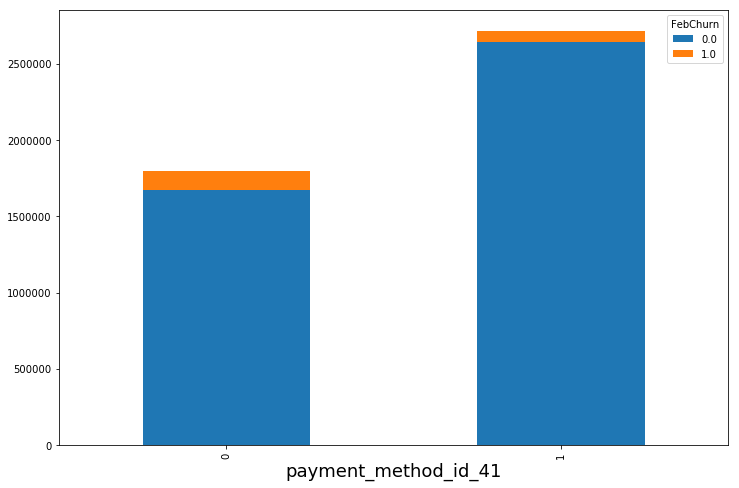

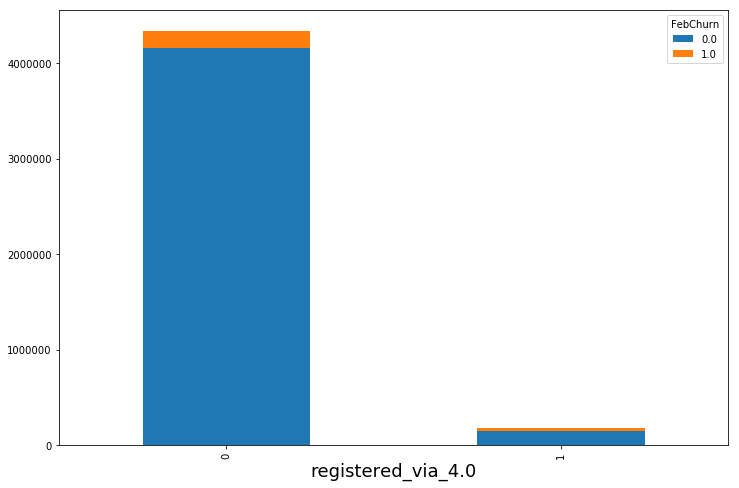

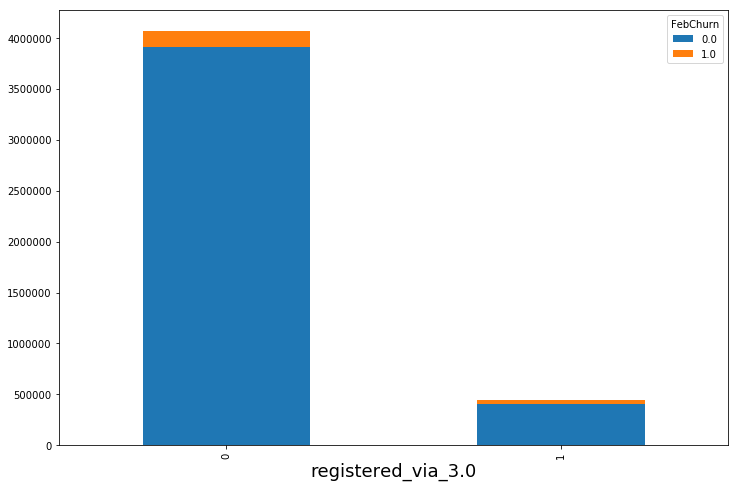

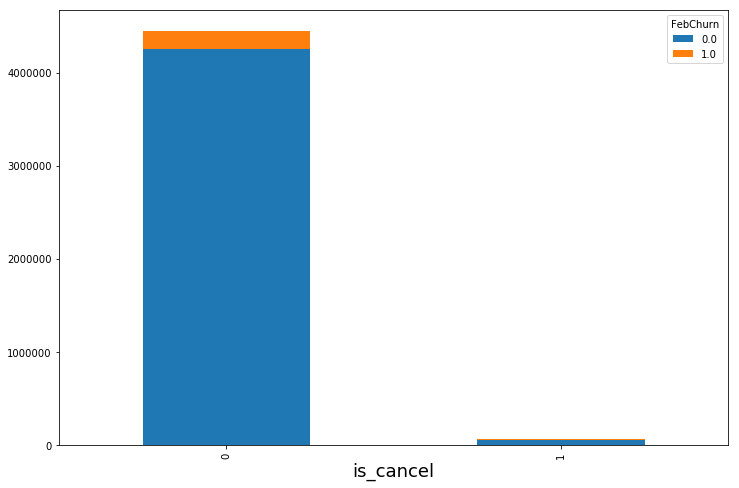

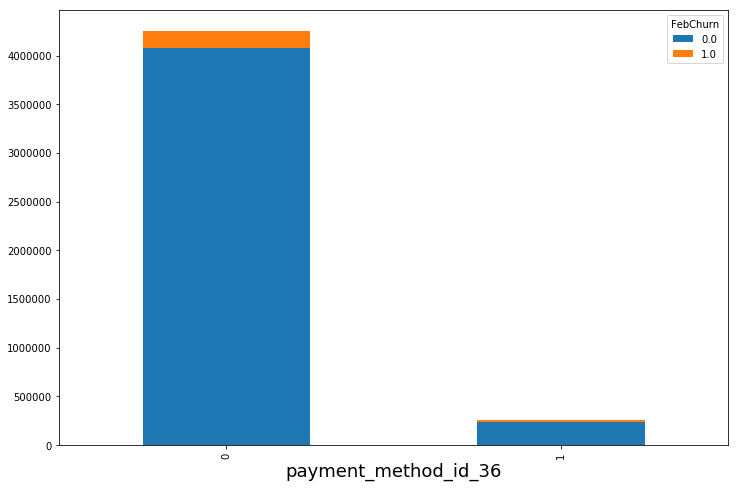

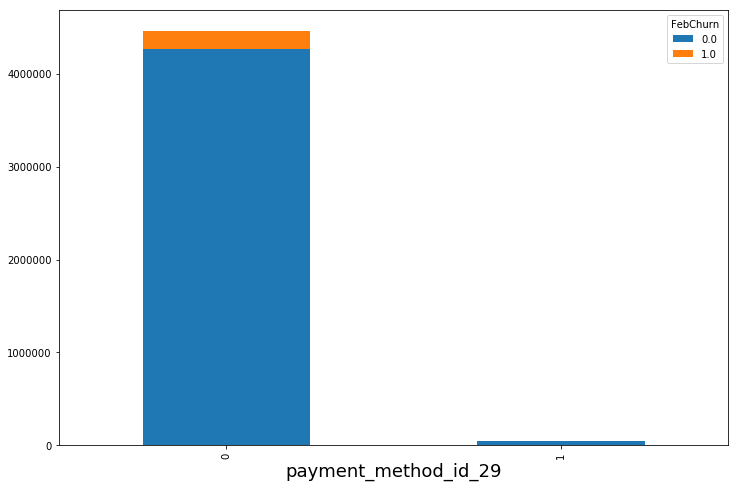

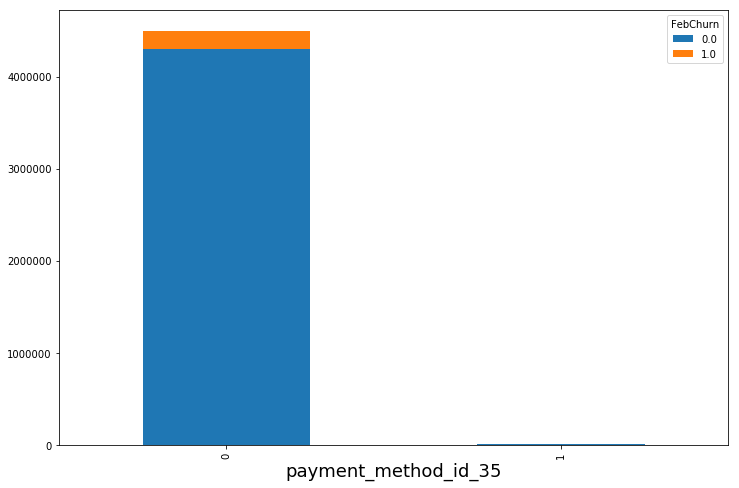

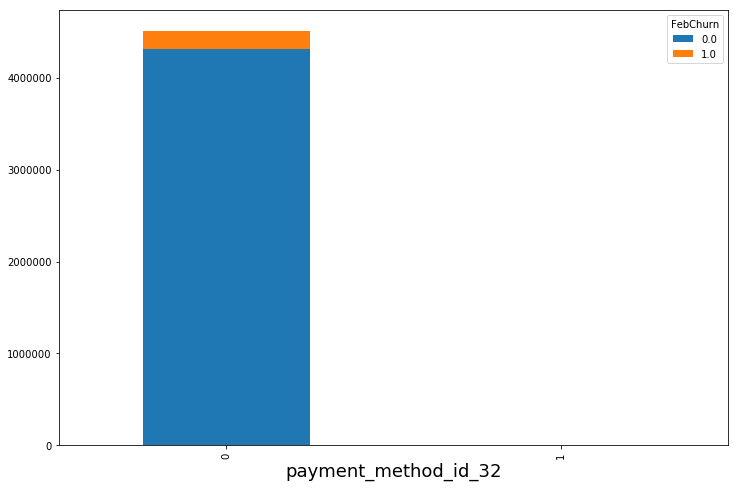

In [42]:
for var_name in var:
    (transaction_merge_log_9to1_oneHot
     .groupby([var_name,'FebChurn'])
     .size()
     .unstack()
     .plot.bar(stacked=True)
    )
    plt.xlabel(var_name, fontsize=18)
    plt.show()

plot으로는 유의미 종속변수와의 관계를 약간 볼 수 있었다.

In [51]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" #'last' 기본값

In [55]:
transaction_merge_log_10to2_oneHot["transaction_date"].min()
transaction_merge_log_10to2_oneHot["transaction_date"].max()
transaction_merge_log_9to1_oneHot["transaction_date"].min()
transaction_merge_log_9to1_oneHot["transaction_date"].max()

'2016-10-01'

'2017-02-28'

'2016-09-01'

'2017-01-31'

In [54]:
transaction_merge_log_10to2_oneHot.shape
transaction_merge_log_10to2_oneHot[:3]

(4399448, 105)

,msno,city,bd,registered_via,registration_init_time,count,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,...,payment_method_id_35,payment_method_id_36,payment_method_id_37,payment_method_id_38,payment_method_id_39,payment_method_id_40,payment_method_id_41,payment_method_id_6,payment_method_id_8,MarChurn
0,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,1.0,0,7.0,2014-06-08,103,41,30,99,99,...,0,0,0,0,0,0,1,0,0,0.0
1,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,1.0,0,7.0,2014-06-08,103,41,30,99,99,...,0,0,0,0,0,0,1,0,0,0.0
2,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,1.0,0,7.0,2014-06-08,103,41,30,99,99,...,0,0,0,0,0,0,1,0,0,0.0


In [56]:
transaction_merge_log_9to1_oneHot.shape
transaction_merge_log_9to1_oneHot[:3]

(4512692, 105)

,msno,city,bd,registered_via,registration_init_time,count,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,...,payment_method_id_35,payment_method_id_36,payment_method_id_37,payment_method_id_38,payment_method_id_39,payment_method_id_40,payment_method_id_41,payment_method_id_6,payment_method_id_8,FebChurn
0,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,1.0,0,7.0,2014-06-08,103,41,30,99,99,...,0,0,0,0,0,0,1,0,0,0.0
1,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,1.0,0,7.0,2014-06-08,103,41,30,99,99,...,0,0,0,0,0,0,1,0,0,0.0
2,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,1.0,0,7.0,2014-06-08,103,41,30,99,99,...,0,0,0,0,0,0,1,0,0,0.0


### Train / Validation data set 설명

- train set
    - train_X = transaction_merge_log_9to1_oneHot
        - train set 독립변수
    - train_y = Feb_churn
        - train set 종속변수
- validation set
    - validation_X = transaction_merge_log_10to2_oneHot
        - validation set 독립변수
    - validation_y = Mar_chrun
        - validation set 종속변수

In [57]:
train_X = transaction_merge_log_9to1_oneHot.copy()
train_y = transaction_merge_log_9to1_oneHot[["msno","FebChurn"]]

validation_X = transaction_merge_log_10to2_oneHot.copy()
validation_y = transaction_merge_log_10to2_oneHot[["msno","MarChurn"]]

del train_X["FebChurn"]
del validation_X["MarChurn"]

In [58]:
train_y[["FebChurn"]] = train_y[["FebChurn"]].astype(str)
validation_y[["MarChurn"]] = validation_y[["MarChurn"]].astype(str)

C:\Anaconda3\lib\site-packages\pandas\core\frame.py:2352: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


## 유효변수를 넣은 것 vs 모든변수를 넣은 것(TODO::)??

In [59]:
train_Xmajor = train_X[['is_auto_renew',          
                        'plan_list_price',        
                        'payment_method_id_41',   
                        'registered_via_4.0',    
                        'registered_via_3.0',    
                        'is_cancel',              
                        'payment_method_id_36',   
                        'payment_method_id_29',   
                        'payment_method_id_35',  
                        'payment_method_id_32']]

validation_Xmajor = validation_X[['is_auto_renew',          
                                'plan_list_price',        
                                'payment_method_id_41',   
                                'registered_via_4.0',    
                                'registered_via_3.0',    
                                'is_cancel',              
                                'payment_method_id_36',   
                                'payment_method_id_29',   
                                'payment_method_id_35',  
                                'payment_method_id_32']]

In [63]:
import tensorflow as tf
import numpy as np

x_data = np.array(train_Xmajor)
train_y_oh = pd.get_dummies(train_y[['FebChurn']])
y_data = np.array(train_y_oh)

#########
# 신경망 모델 구성
######
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
keep_prob = tf.placeholder(tf.float32)

W1 = tf.Variable(tf.random_uniform([x_data.shape[1], 20], -1., 1.))
W2 = tf.Variable(tf.random_uniform([20, 20], -1., 1.))
W3 = tf.Variable(tf.random_uniform([20, 20], -1., 1.))
W4 = tf.Variable(tf.random_uniform([20, y_data.shape[1]], -1., 1.))

b1 = tf.Variable(tf.zeros([20]))
b2 = tf.Variable(tf.zeros([20]))
b3 = tf.Variable(tf.zeros([20]))
b4 = tf.Variable(tf.zeros([y_data.shape[1]]))

# 신경망의 히든 레이어에 가중치 W1과 편향 b1을 적용합니다
L1 = tf.add(tf.matmul(X, W1), b1)
L1 = tf.nn.relu(L1)
# L1 = tf.nn.dropout(L1, keep_prob=keep_prob)

L2 = tf.add(tf.matmul(L1, W2), b2)
L2 = tf.nn.relu(L2)

L3 = tf.add(tf.matmul(L2, W3), b3)
L3 = tf.nn.relu(L3)

# 최종적인 아웃풋을 계산합니다.
# 히든레이어에 두번째 가중치 W2와 편향 b2를 적용하여 3개의 출력값을 만들어냅니다.
model = tf.add(tf.matmul(L3, W4), b4)

# 텐서플로우에서 기본적으로 제공되는 크로스 엔트로피 함수를 이용해
# 복잡한 수식을 사용하지 않고도 최적화를 위한 비용 함수를 다음처럼 간단하게 적용할 수 있습니다.
cost = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=Y, logits=model))

optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
train_op = optimizer.minimize(cost)

#########
# 신경망 모델 학습
######
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for step in range(50):
    sess.run(train_op, feed_dict={X: x_data, Y: y_data})
    if (step + 1) % 5 == 0:
        print(step + 1, sess.run(cost, feed_dict={X: x_data, Y: y_data}))

#########
# 결과 확인
######
x_val = np.array(validation_Xmajor)
val_y_oh = pd.get_dummies(validation_y[['MarChurn']])
y_val = np.array(val_y_oh)

prediction = tf.argmax(model, 1)
target = tf.argmax(Y, 1)
prediction_nn = []
pred_nn = sess.run(prediction, feed_dict={X: x_val})
print('예측값:', pred_nn)
prediction_nn.append(pred_nn)
print('실제값:', sess.run(target, feed_dict={Y: y_val}))

is_correct = tf.equal(prediction, target)
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도: %.2f' % sess.run(accuracy * 100, feed_dict={X: x_val, Y: y_val}))

5 1.32466
10 6.25213
15 10.5776
20 9.41897
25 5.56484
30 1.06765
35 2.35851
40 4.1269
45 3.39384
50 1.36873
예측값: [0 0 0 ..., 0 0 0]
실제값: [0 0 0 ..., 0 0 0]
정확도: 93.83


In [87]:
result = pd.DataFrame(
    {'real_value': list(validation_y['MarChurn']),
     'prediction': prediction_nn[0],
     'msno': list(validation_X["msno"])
    })

In [88]:
mnn_result_cross = pd.crosstab(result["real_value"], result["prediction"])
mnn_result_cross

prediction,0,1
real_value,,
0.0,4126481,997
1.0,270267,1703


In [89]:
mnn_r00 = mnn_result_cross[0][0]
mnn_r01 = mnn_result_cross[0][1]
mnn_r10 = mnn_result_cross[1][0]
mnn_r11 = mnn_result_cross[1][1]

In [90]:
print("전체예측:",(mnn_r00+mnn_r11)/(mnn_r00+mnn_r01+mnn_r10+mnn_r11))
print("1인데 1로 예측:",(mnn_r11)/(mnn_r01+mnn_r11))
print("0인데 1로 잘못예측:",(mnn_r01)/(mnn_r01+mnn_r00))
print("1인데 0으로 잘못예측:",(mnn_r10)/(mnn_r01+mnn_r00))

전체예측: 0.938341355552
1인데 1로 예측: 0.00626172004265
0인데 1로 잘못예측: 0.0614697499152
1인데 0으로 잘못예측: 0.00022675850424


In [91]:
result[['prediction']] = result[['prediction']].astype(str)

In [92]:
result[['real_value']] = result[['real_value']].astype(float)
result[['real_value']] = result[['real_value']].astype(int)

In [96]:
result[['real_value']] = result[['real_value']].astype(str)

In [97]:
result.shape

(4399448, 3)

In [95]:
result.to_csv("E:/kaggle/final_data/Predict_MarChurn.csv", index=False)

In [1]:
import pandas as pd
result = pd.read_csv("E:/kaggle/final_data/Predict_MarChurn.csv")

In [6]:
result.dtypes

msno          object
prediction     int64
real_value     int64
dtype: object

In [9]:
result.shape

(4399448, 3)

In [83]:
import numpy as np
from statistics import mean

In [12]:
groupby_result = result.groupby(['msno']).mean()

In [14]:
groupby_result.round(2)

,prediction,real_value
msno,,
+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,0.00,0.0
+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,0.00,0.0
+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,0.00,0.0
++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,0.00,0.0
++/UDNo9DLrxT8QVGiDi1OnWfczAdEwThaVyD0fXO50=,0.00,0.0
++/ZHqwUNa7U21Qz+zqteiXlZapxey86l6eEorrak/g=,0.00,0.0
++0/NopttBsaAn6qHZA2AWWrDg7Me7UOMs1vsyo4tSI=,0.00,0.0
++0BJXY8tpirgIhJR14LDM1pnaRosjD1mdO1mIKxlJA=,0.00,0.0
++0EzISdtKY48Z0GY62jer/LFQwrNIAbADdtU5xStGY=,0.00,0.0


In [15]:
groupby_result.describe()

,prediction,real_value
count,949023.000000,949023.000000
mean,0.000736,0.072919
std,0.020440,0.260004
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


In [16]:
groupby_result.to_csv("E:/kaggle/final_data/Predict_MarChurn_groupby.csv")

In [17]:
groupby_result = pd.read_csv("E:/kaggle/final_data/Predict_MarChurn_groupby.csv")

In [18]:
groupby_result

,msno,prediction,real_value
0,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,0.000000,0.0
1,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,0.000000,0.0
2,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,0.000000,0.0
3,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,0.000000,0.0
4,++/UDNo9DLrxT8QVGiDi1OnWfczAdEwThaVyD0fXO50=,0.000000,0.0
5,++/ZHqwUNa7U21Qz+zqteiXlZapxey86l6eEorrak/g=,0.000000,0.0
6,++0/NopttBsaAn6qHZA2AWWrDg7Me7UOMs1vsyo4tSI=,0.000000,0.0
7,++0BJXY8tpirgIhJR14LDM1pnaRosjD1mdO1mIKxlJA=,0.000000,0.0
8,++0EzISdtKY48Z0GY62jer/LFQwrNIAbADdtU5xStGY=,0.000000,0.0
9,++0wqjjQge1mBBe5r4ciHGKwtF/m322zkra7CK8I+Mw=,0.000000,0.0


In [19]:
result_cross = pd.crosstab(groupby_result["real_value"], groupby_result["prediction"])
result_cross

prediction,0.0,0.0714285714286,0.0769230769231,0.0833333333333,0.111111111111,0.125,0.142857142857,0.166666666667,0.2,0.222222222222,...,0.428571428571,0.5,0.571428571429,0.6,0.666666666667,0.84,0.857142857143,0.961538461538,0.977443609023,1.0
real_value,,,,,,,,,,,,,,,,,,,,,
0.0,878897,0,0,0,7,25,58,175,210,4,...,0,107,2,0,5,0,0,0,0,13
1.0,68302,1,1,1,4,11,27,60,81,2,...,6,193,0,2,1,1,1,1,1,223


In [20]:
y_true = groupby_result["real_value"]
y_pred = groupby_result["prediction"]

In [21]:
from sklearn.metrics import log_loss
log_loss(y_true, y_pred, eps=1e-15)

2.4874210905519432